첫 번째 시간
- 실습

ㄴ### 목표
- 머신러닝에서 사용해봤던 iris 품종 예측 다중분류 문제를 신경망으로 풀어보자!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sklearn의 iris 데이터셋
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = data['data']
y = data['target']

In [5]:
X.shape, y.shape

((150, 4), (150,))

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 정답 데이터 인코딩
- 신경망 출력층에서 각 클래스 값들에 대한 확률(0-1)값과 비교하여 정확한 오차를 구하기 위해서 정답의 범위도 0~1 사이 값으로 변환시켜줘야함
-

In [8]:
y_one_hot = pd.get_dummies(y)
y_one_hot

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=55)

In [10]:
print(X_train.shape)
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


### 신경망 모델링
- 1. 신경망 구조 설계
- 2. 학습 및 평가방법 설정
- 3. 학습 및 시각화
- 4. 모델평가

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
# y = wx + b // 파라미터값 , 층당 몇개가 있는지 , 각 뉴런들이 갖고있는 수식별 이 값들이 생김.
# 신경망에 들어오는 데이터 개수 ; 데이터 특성 > 컬럼개수 4
# 1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)
model.add(Dense(50, input_dim=4, activation = 'sigmoid'))

# 중간층
model.add(Dense(100, activation='sigmoid'))    #하나의 층
model.add(Dense(50, activation='sigmoid'))   #하나의 층

# 출력층
# 출력층은 문제의 종류에 따라 고정됨 (2진분류 문제는 출력층 뉴런개수 1개, 활성화함수는 sigmoid로 고정)
model.add(Dense(50,activation='sigmoid'))   # 세개이상일 땐 다중분류 해야함
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                250       
                                                                 
 dense_21 (Dense)            (None, 100)               5100      
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dense_23 (Dense)            (None, 50)                2550      
                                                                 
 dense_24 (Dense)            (None, 3)                 153       
                                                                 
Total params: 13,103
Trainable params: 13,103
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 2. 학습 및 평가방법 설정
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam', # 최적화함수: 확률적경사하강법(SGD) 활용
              metrics = ['acc']   #metrics: 평가 방법을 설정(분류 믄제이므로 정확도 출력 필요)
              )
h = model.fit(X_train, y_train,
              epochs = 200
              )

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 1.1784 - acc: 0.3333
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1247 - acc: 0.3333
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0989 - acc: 0.3167
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0980 - acc: 0.5083
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1006 - acc: 0.3417
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1012 - acc: 0.3417
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0986 - acc: 0.3417
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0949 - acc: 0.3417
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0936 - acc: 0.3417
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0924 - acc: 0.4250
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0914 

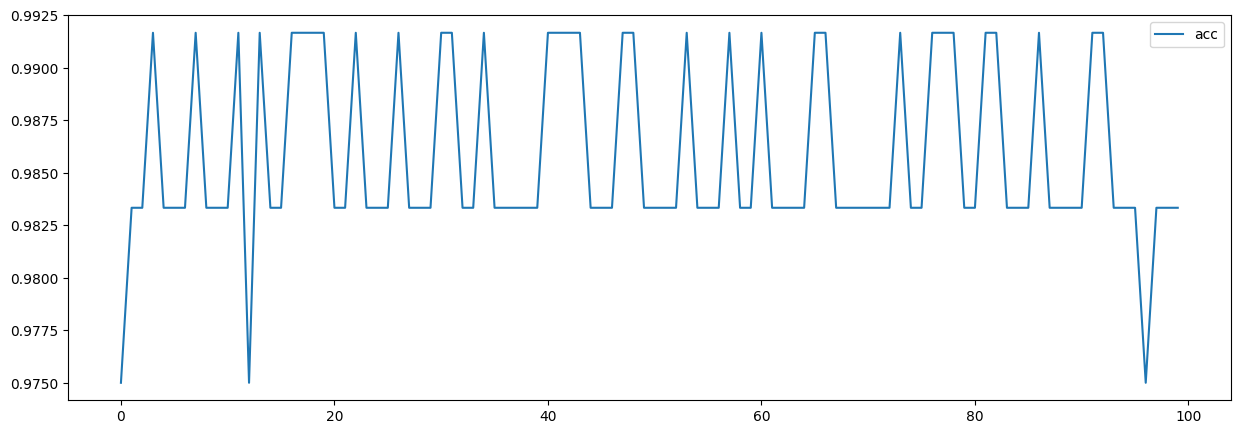

In [28]:
# 3. 시각화
plt.figure(figsize=(15, 5))

plt.plot(h.history['acc'], label = 'acc')

plt.legend()
plt.show()

In [24]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 194ms/step - loss: 0.0747 - acc: 0.9667


[0.07467453926801682, 0.9666666388511658]